In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
 df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df.defaulted.value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [18]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [20]:
# Putting feature variable to X
X = df.drop(['defaulted', 'ID'],axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier()

In [25]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
pred = rf.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.63      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [30]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(4, 20, 2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 20, 2)}, return_train_score=True,
             scoring='accuracy')

In [31]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.926538,0.014340,0.030660,0.001820,4,{'max_depth': 4},0.810476,0.814048,0.810952,0.807381,...,0.810238,0.002318,8,0.810714,0.810417,0.813333,0.813869,0.811786,0.812024,0.001377
1,1.270555,0.046214,0.034903,0.000602,6,{'max_depth': 6},0.817143,0.818095,0.817619,0.813095,...,0.817048,0.002101,3,0.826845,0.823571,0.825536,0.825714,0.827560,0.825845,0.001358
2,1.566117,0.029402,0.041918,0.001069,8,{'max_depth': 8},0.815476,0.821429,0.819286,0.815238,...,0.818238,0.002459,1,0.839702,0.839464,0.840893,0.842976,0.841250,0.840857,0.001259
3,1.872611,0.038308,0.048282,0.001718,10,{'max_depth': 10},0.816667,0.820476,0.819762,0.812857,...,0.818000,0.002915,2,0.862262,0.860060,0.859821,0.865000,0.862262,0.861881,0.001875
4,2.156648,0.073203,0.054451,0.000671,12,{'max_depth': 12},0.814762,0.818810,0.818571,0.813095,...,0.816714,0.002340,4,0.884643,0.885060,0.882381,0.885357,0.885119,0.884512,0.001090


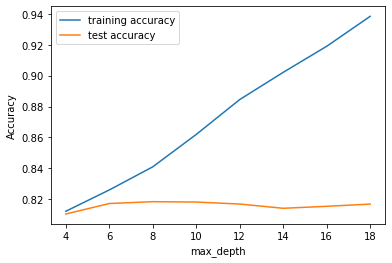

In [32]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [35]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.924057,0.025811,0.029706,0.000689,100,{'n_estimators': 100},0.812857,0.811429,0.811905,0.808095,...,0.810333,0.002180,1,0.811786,0.810238,0.812679,0.813750,0.812798,0.812250,0.001183
1,4.537511,0.077610,0.138278,0.002069,500,{'n_estimators': 500},0.811429,0.814286,0.811190,0.805476,...,0.810238,0.002947,3,0.811071,0.810655,0.811726,0.813036,0.812560,0.811810,0.000889
2,8.110594,0.056447,0.244395,0.005139,900,{'n_estimators': 900},0.811667,0.814286,0.811905,0.805714,...,0.810333,0.003040,1,0.810893,0.810060,0.811786,0.812798,0.812976,0.811702,0.001112
3,12.073076,0.719893,0.353877,0.008876,1300,{'n_estimators': 1300},0.810952,0.814524,0.810952,0.805000,...,0.810048,0.003120,4,0.811250,0.810357,0.812560,0.812083,0.812738,0.811798,0.000886


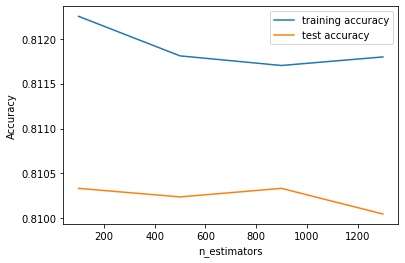

In [36]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20]},
             return_train_score=True, scoring='accuracy')

In [39]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.918512,0.013648,0.029355,0.001013,4,{'max_features': 4},0.811429,0.813571,0.810714,0.805000,...,0.809571,0.003084,4,0.811071,0.811369,0.811964,0.812321,0.811548,0.811655,0.000441
1,1.605756,0.060549,0.028212,0.001134,8,{'max_features': 8},0.818095,0.820714,0.819524,0.817857,...,0.818952,0.001050,2,0.822202,0.820357,0.822083,0.821607,0.821548,0.821560,0.000654
2,2.628163,0.093004,0.029548,0.002145,14,{'max_features': 14},0.818095,0.820714,0.818810,0.817619,...,0.818714,0.001071,3,0.822083,0.820536,0.821905,0.822976,0.821726,0.821845,0.000783
3,3.579532,0.069549,0.029305,0.002175,20,{'max_features': 20},0.817381,0.820476,0.819524,0.819048,...,0.819143,0.001006,1,0.822857,0.820714,0.821548,0.823155,0.823393,0.822333,0.001031


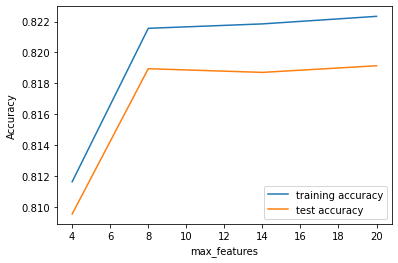

In [40]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [42]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [43]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8184761904761905 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


In [53]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             class_weight='balanced',
                             max_features=10,
                             n_estimators=100
                    )

In [ ]:
RandomForestClassifier()

In [54]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_leaf=100, min_samples_split=200)

In [55]:
predictions = rfc.predict(X_test)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7058
           1       0.48      0.62      0.54      1942

    accuracy                           0.77      9000
   macro avg       0.68      0.72      0.69      9000
weighted avg       0.80      0.77      0.78      9000



In [57]:
rfc.feature_importances_

array([0.04197431, 0.00233988, 0.00281892, 0.00348681, 0.00778075,
       0.41775392, 0.12510368, 0.06977408, 0.0408294 , 0.03537821,
       0.00892927, 0.03144374, 0.0198358 , 0.01542184, 0.00905292,
       0.00981799, 0.00873791, 0.02256083, 0.04125783, 0.03204485,
       0.02206924, 0.01763032, 0.01395751])